In [ ]:
import tensorflow as tf
import keras
from tensorflow.keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from keras.models import load_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression

In [ ]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Check the shape of the dataset
print("Training dataset shape:", x_train.shape)
print("Test dataset shape:", x_test.shape)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

Training dataset shape: (60000, 28, 28)
Test dataset shape: (10000, 28, 28)
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


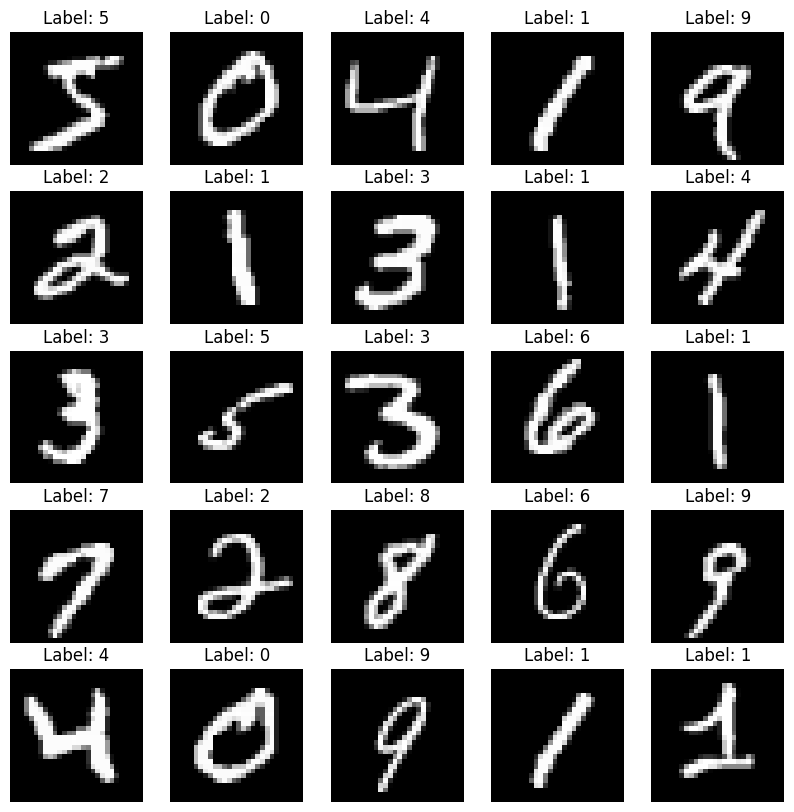

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title("Label: {}".format(y_train[i]))
    plt.axis('off')
plt.show()

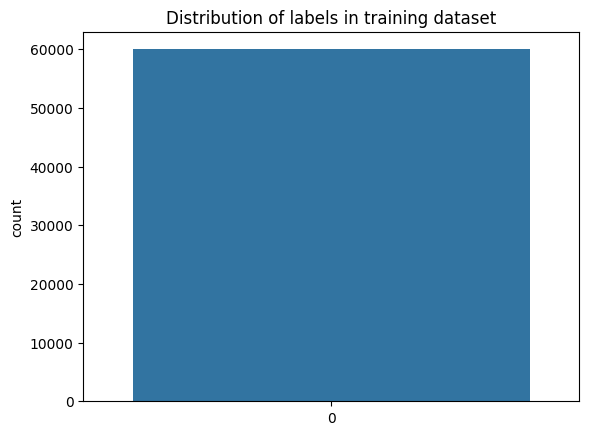

In [ ]:
# Check the distribution of the labels in the training dataset
sns.countplot(y_train)
plt.title("Distribution of labels in training dataset")
plt.show()

In [ ]:
x_train = x_train.reshape((60000,28,28,1))
x_test = x_test.reshape((10000,28,28,1))

In [ ]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [ ]:
from keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
print('x_train', x_train.shape)
print(x_train.shape[0],'Train Sample')
print(x_test.shape[0],'Test Sample')

x_train (60000, 28, 28, 1)
60000 Train Sample
10000 Test Sample


In [ ]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

In [ ]:
# print shape of training set
print('x_train shape:', x_train.shape)
# the 3 is referring to colored image
# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

x_train shape: (55000, 28, 28, 1)
55000 train samples
10000 test samples
5000 validation samples


In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(64,(3,3),padding='same', activation='relu', input_shape = (28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(layers.Conv2D(192,(3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(Dropout(0.3))

model.add(layers.Flatten())
model.add(layers.Dense(264,activation = 'relu'))
model.add(layers.Dense(10, activation= 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 128)        0

In [ ]:
from keras.optimizers import Adadelta, RMSprop, Adam
from keras.losses import categorical_crossentropy
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score

In [ ]:
# compile the model
model.compile(loss= 'categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
# Model training

history=model.fit(x_train,y_train , batch_size=128,epochs=100,validation_data=(x_valid, y_valid),verbose=1, shuffle=True)

Epoch 1/100
430/430 [==============================] - 183s 419ms/step - loss: 0.3133 - accuracy: 0.8964 - val_loss: 0.0571 - val_accuracy: 0.9834
Epoch 2/100
430/430 [==============================] - 185s 431ms/step - loss: 0.0769 - accuracy: 0.9767 - val_loss: 0.0466 - val_accuracy: 0.9858
Epoch 3/100
430/430 [==============================] - 181s 420ms/step - loss: 0.0525 - accuracy: 0.9841 - val_loss: 0.0300 - val_accuracy: 0.9912
Epoch 4/100
430/430 [==============================] - 178s 413ms/step - loss: 0.0415 - accuracy: 0.9873 - val_loss: 0.0311 - val_accuracy: 0.9910
Epoch 5/100
430/430 [==============================] - 185s 430ms/step - loss: 0.0360 - accuracy: 0.9889 - val_loss: 0.0331 - val_accuracy: 0.9896
Epoch 6/100
430/430 [==============================] - 178s 414ms/step - loss: 0.0315 - accuracy: 0.9901 - val_loss: 0.0292 - val_accuracy: 0.9926
Epoch 7/100
430/430 [==============================] - 176s 410ms/step - loss: 0.0282 - accuracy: 0.9912 - val_loss: 0

In [ ]:
accuracy = history.history['accuracy']
accuracy

[0.8963636159896851,
 0.9766727089881897,
 0.9841272830963135,
 0.9872909188270569,
 0.9888727068901062,
 0.9901272654533386,
 0.9912363886833191,
 0.992618203163147,
 0.9928727149963379,
 0.9930545687675476,
 0.9941818118095398,
 0.9941272735595703,
 0.9950181841850281,
 0.9949818253517151,
 0.99516361951828,
 0.9961636066436768,
 0.9952181577682495,
 0.9957636594772339,
 0.9960908889770508,
 0.9965272545814514,
 0.9970727562904358,
 0.996963620185852,
 0.9966909289360046,
 0.9968181848526001,
 0.9968545436859131,
 0.9968727231025696,
 0.9971454739570618,
 0.9974181652069092,
 0.9973999857902527,
 0.9979636073112488,
 0.9966182112693787,
 0.9982181787490845,
 0.99798184633255,
 0.9972909092903137,
 0.99798184633255,
 0.998090922832489,
 0.9983090758323669,
 0.9987272620201111,
 0.9974181652069092,
 0.9983090758323669,
 0.998236358165741,
 0.9985272884368896,
 0.998236358165741,
 0.9984545707702637,
 0.9983999729156494,
 0.9979090690612793,
 0.9983817934989929,
 0.998236358165741,
 0.9

In [ ]:
val_accuracy = history.history['val_accuracy']
val_accuracy

[0.9833999872207642,
 0.98580002784729,
 0.9911999702453613,
 0.9909999966621399,
 0.9896000027656555,
 0.9926000237464905,
 0.9914000034332275,
 0.9918000102043152,
 0.9932000041007996,
 0.9922000169754028,
 0.9936000108718872,
 0.991599977016449,
 0.9929999709129333,
 0.9929999709129333,
 0.9932000041007996,
 0.9940000176429749,
 0.9918000102043152,
 0.9932000041007996,
 0.9932000041007996,
 0.9937999844551086,
 0.9940000176429749,
 0.9941999912261963,
 0.9932000041007996,
 0.9937999844551086,
 0.9936000108718872,
 0.9944000244140625,
 0.9927999973297119,
 0.9941999912261963,
 0.993399977684021,
 0.9927999973297119,
 0.9955999851226807,
 0.9932000041007996,
 0.9932000041007996,
 0.9936000108718872,
 0.9937999844551086,
 0.9929999709129333,
 0.9932000041007996,
 0.9927999973297119,
 0.9944000244140625,
 0.9941999912261963,
 0.9940000176429749,
 0.9932000041007996,
 0.9929999709129333,
 0.9923999905586243,
 0.9923999905586243,
 0.993399977684021,
 0.9932000041007996,
 0.993399977684021

In [ ]:
epochs = range(1, len(accuracy) +1)

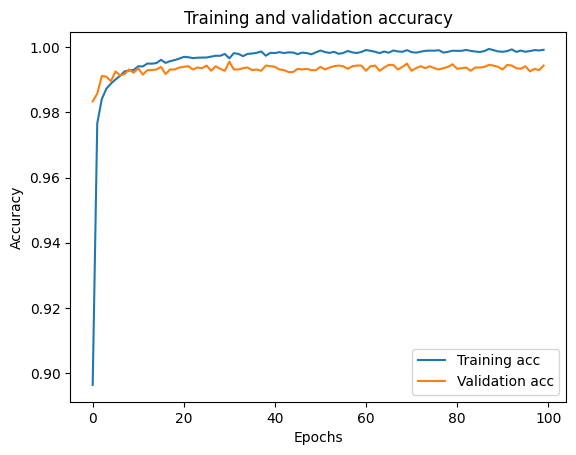

In [ ]:
sns.lineplot(accuracy, label='Training acc')
sns.lineplot(val_accuracy, label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
loss = history.history['loss']
loss

[0.31333523988723755,
 0.07687488198280334,
 0.052464861422777176,
 0.04151797294616699,
 0.03597269579768181,
 0.03154691308736801,
 0.028205135837197304,
 0.02397436834871769,
 0.02200452983379364,
 0.021690791472792625,
 0.019087528809905052,
 0.01880904845893383,
 0.015640031546354294,
 0.016445929184556007,
 0.01544225588440895,
 0.012844488024711609,
 0.014162490144371986,
 0.01254582405090332,
 0.011878406628966331,
 0.011293039657175541,
 0.009717915207147598,
 0.00913756899535656,
 0.010576390661299229,
 0.009593920782208443,
 0.009608733467757702,
 0.009228440932929516,
 0.008551971055567265,
 0.007630452513694763,
 0.008538412861526012,
 0.006323274224996567,
 0.01068023033440113,
 0.006187125109136105,
 0.006133000832051039,
 0.008319821208715439,
 0.006411021109670401,
 0.006461603567004204,
 0.005679548718035221,
 0.005079004447907209,
 0.008505254052579403,
 0.006113223731517792,
 0.005462097004055977,
 0.005195396952331066,
 0.006162830628454685,
 0.005340013187378645,


In [ ]:
val_loss = history.history['val_loss']
val_loss

[0.05706794932484627,
 0.04664013162255287,
 0.029971035197377205,
 0.03109908476471901,
 0.033058468252420425,
 0.029218917712569237,
 0.030957592651247978,
 0.03356291353702545,
 0.025397030636668205,
 0.028976721689105034,
 0.026644043624401093,
 0.030630316585302353,
 0.02588973008096218,
 0.026252569630742073,
 0.02441450208425522,
 0.022601641714572906,
 0.03284755349159241,
 0.03045090287923813,
 0.025095827877521515,
 0.03004264459013939,
 0.03349567949771881,
 0.02672489546239376,
 0.03122716024518013,
 0.030399732291698456,
 0.03447369858622551,
 0.02237980253994465,
 0.030881842598319054,
 0.029922394081950188,
 0.027715113013982773,
 0.03290744498372078,
 0.02295805886387825,
 0.03159865364432335,
 0.03610322251915932,
 0.02910693734884262,
 0.03537191078066826,
 0.03671112656593323,
 0.024564361199736595,
 0.03701940178871155,
 0.028662927448749542,
 0.03779406100511551,
 0.033188823610544205,
 0.04695254564285278,
 0.04354437440633774,
 0.034878529608249664,
 0.0401364080

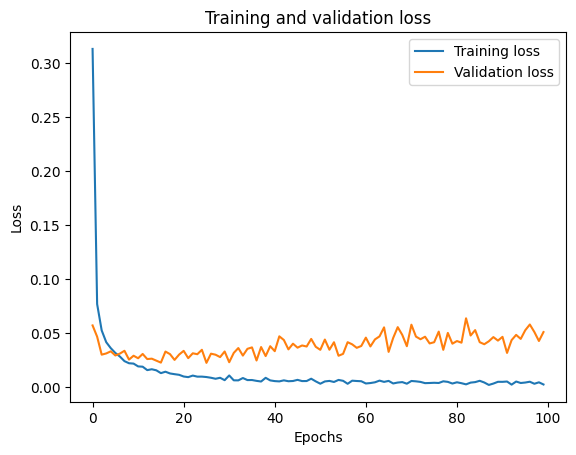

In [ ]:
sns.lineplot(loss, label='Training loss')
sns.lineplot(val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
y_hat=model.predict(x_test)
y_hat

313/313 [==============================] - 8s 24ms/step


array([[0.00000000e+00, 7.86112526e-26, 3.78206371e-28, ...,
        9.99999940e-01, 0.00000000e+00, 3.06755727e-27],
       [6.98397062e-17, 1.56696897e-21, 9.99999940e-01, ...,
        5.67142842e-19, 1.11833981e-18, 1.36605277e-27],
       [5.95169663e-37, 9.99999940e-01, 2.08227145e-30, ...,
        9.41857081e-30, 1.08918845e-32, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        3.09960550e-38, 4.77546777e-37, 1.56292027e-30],
       [3.70948636e-31, 0.00000000e+00, 2.08744364e-35, ...,
        3.02690851e-34, 2.94906894e-30, 6.12279075e-25],
       [5.97155901e-19, 9.18169486e-24, 1.09059919e-22, ...,
        0.00000000e+00, 3.79252643e-19, 8.09854629e-33]], dtype=float32)

In [ ]:
# Evaluate the model on the test set
score=model.evaluate(x_test,y_test)
cnn_acc = 100*score[1]

313/313 [==============================] - 12s 37ms/step - loss: 0.0456 - accuracy: 0.9939


In [ ]:
# print test accuracy
print('Test accuracy: %.4f%%' % cnn_acc)

Test accuracy: 99.3900%


In [ ]:
# every no. these are the actual labels in the dataset

mnist_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

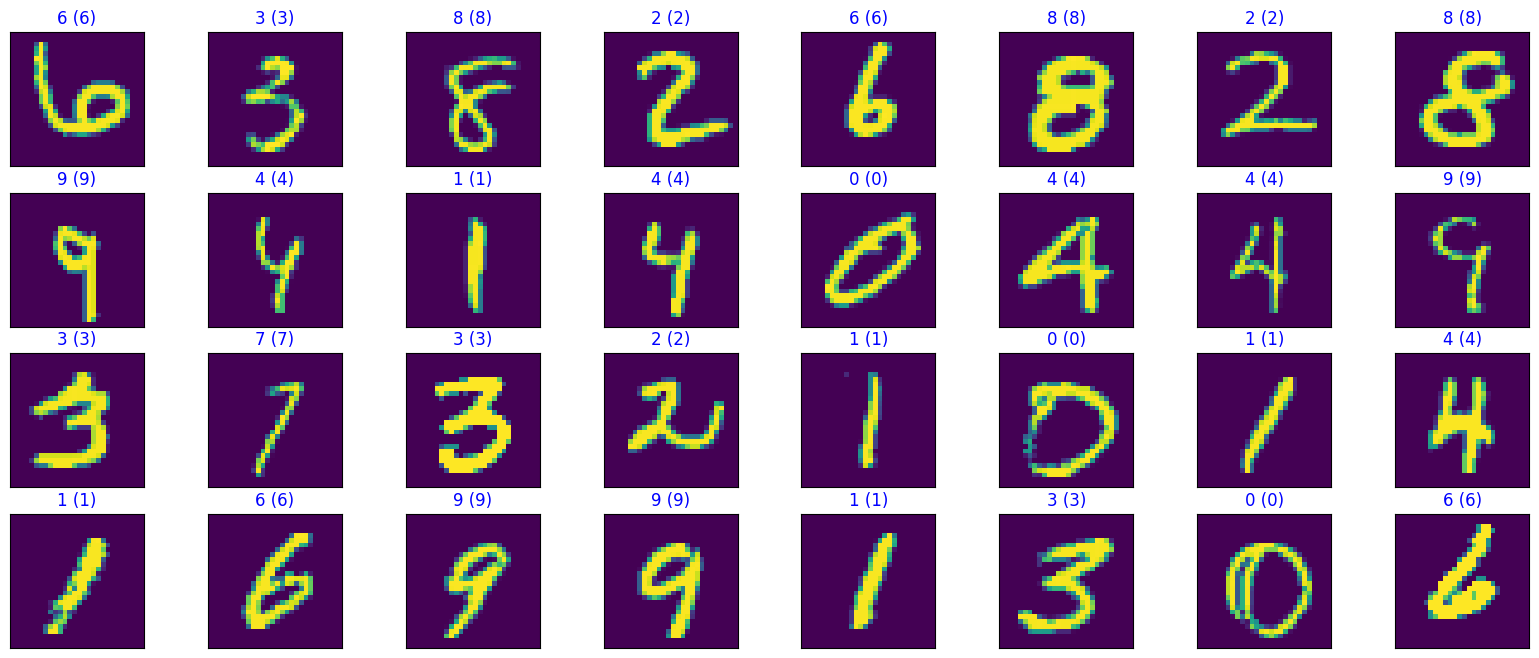

In [ ]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax=fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(mnist_labels[pred_idx], mnist_labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))

ANN

In [ ]:
# Define the model architecture
# setting up the layers of the Neural  Network

model_ann = keras.Sequential([
                          keras.layers.Flatten(input_shape=(28,28)),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(50, activation='relu'),
                          keras.layers.Dense(10, activation='sigmoid')])

In [ ]:
# Compile the model
model_ann.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history_ann = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1719/1719 [==============================] - 193s 112ms/step - loss: 0.0183 - accuracy: 0.9961
Epoch 2/10
1719/1719 [==============================] - 189s 110ms/step - loss: 0.0140 - accuracy: 0.9970
Epoch 3/10
1719/1719 [==============================] - 184s 107ms/step - loss: 0.0106 - accuracy: 0.9973
Epoch 4/10
1719/1719 [==============================] - 185s 108ms/step - loss: 0.0096 - accuracy: 0.9975
Epoch 5/10
1719/1719 [==============================] - 186s 108ms/step - loss: 0.0111 - accuracy: 0.9971
Epoch 6/10
1719/1719 [==============================] - 183s 106ms/step - loss: 0.0130 - accuracy: 0.9969
Epoch 7/10
1719/1719 [==============================] - 184s 107ms/step - loss: 0.0139 - accuracy: 0.9969
Epoch 8/10
1719/1719 [==============================] - 182s 106ms/step - loss: 0.0117 - accuracy: 0.9971
Epoch 9/10
1719/1719 [==============================] - 181s 105ms/step - loss: 0.0131 - accuracy: 0.9972
Epoch 10/10
1719/1719 [=======================

In [ ]:
ann_acc = model_ann.evaluate(x_test, y_test)
ann_acc = 100*score[1]

print('Test accuracy: %.4f%%' % ann_acc)

313/313 [==============================] - 2s 3ms/step - loss: 2.3749 - accuracy: 0.1333
Test accuracy: 99.3900%


In [ ]:
print(x_test.shape)

(10000, 28, 28, 1)


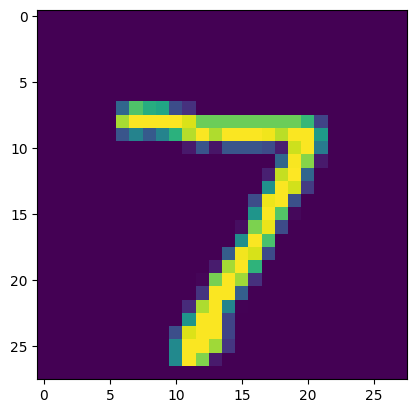

In [ ]:
# first data point in X_test
plt.imshow(x_test[0])
plt.show()

In [ ]:
Y_pred = model.predict(x_test)
print(Y_pred[0])

313/313 [==============================] - 7s 22ms/step
[8.8974503e-29 2.4417160e-13 1.2090895e-25 6.0773481e-24 5.4870553e-24
 6.7492271e-29 0.0000000e+00 9.9999994e-01 8.4828392e-32 5.6724827e-21]


In [ ]:
# converting the prediction probabilities to class label

label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [ ]:
# Trying with oter ML Models

# Data preprocessing for modelling

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [ ]:
print("Training dataset shape:", x_train.shape)
print("Test dataset shape:", x_test.shape)
print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)

Training dataset shape: (60000, 28, 28)
Test dataset shape: (10000, 28, 28)
(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
# Reshape input data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [ ]:
#scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train,y_train)
x_train=scaler.transform(x_train)
x_train.shape

(60000, 784)

In [ ]:
# KNN

In [ ]:
# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

In [ ]:
error_rate

[0.2553, 0.2649, 0.2301, 0.2152, 0.1957, 0.1975, 0.1871, 0.1864, 0.18, 0.1796]

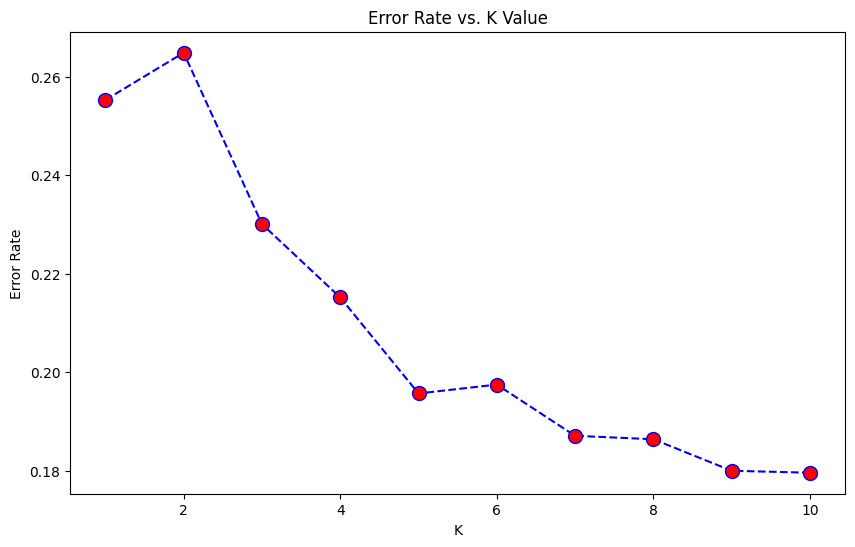

In [ ]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed',
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier= KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred=classifier.predict(x_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
print(accuracy_score(y_test,y_pred))

0.8043


In [ ]:
classifier= KNeighborsClassifier(n_neighbors=7)
classifier.fit(x_train,y_train)
y_pred_7=classifier.predict(x_test)
y_pred_7

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [ ]:
knn_acc=accuracy_score(y_test,y_pred_7)
knn_acc

0.8129

In [ ]:
# SVC

In [ ]:
clf=svm.SVC(kernel='linear',C=10,random_state=0)
clf.fit(x_train,y_train)
y_pred_svm=clf.predict(x_test)
y_pred_svm

array([7, 2, 8, ..., 4, 8, 6], dtype=uint8)

In [ ]:
svc_acc=accuracy_score(y_test,y_pred_svm)
svc_acc

0.8205

In [ ]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       980
           1       0.98      0.78      0.86      1135
           2       0.95      0.77      0.85      1032
           3       0.76      0.91      0.83      1010
           4       0.84      0.92      0.88       982
           5       0.98      0.31      0.47       892
           6       0.90      0.94      0.92       958
           7       0.99      0.78      0.87      1028
           8       0.52      0.95      0.68       974
           9       0.86      0.81      0.84      1009

    accuracy                           0.82     10000
   macro avg       0.86      0.82      0.81     10000
weighted avg       0.86      0.82      0.82     10000



In [ ]:
# LOGISTIC REGRESSION

In [ ]:
log_classifier=LogisticRegression()
log_classifier.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred_log=log_classifier.predict(x_test)
y_pred_log

array([7, 2, 1, ..., 4, 8, 6], dtype=uint8)

In [ ]:
lr_acc=accuracy_score(y_test,y_pred_log)
lr_acc

0.8372

In [ ]:
# Model Comparision Report

In [ ]:
models=pd.DataFrame({
    'Accuracy score' :[cnn_acc,ann_acc,knn_acc,svc_acc,lr_acc]},
    index=['CNN','ANN','KNN','SVC','Logistic Regression'])

models

,Accuracy score
CNN,99.3900
ANN,99.3900
KNN,0.8129
SVC,0.8205
Logistic Regression,0.8372


In [ ]:
# Based on the above comparision report, both ANN and CNN are performing well but for the HandWrittern digits project we are going with the CNN with an accuracy score of 99.44%